#  Customer Churn Prediction

###  Overview

This project predicts whether a customer will churn (leave) or stay using machine learning.
It helps businesses identify at-risk customers and take actions to improve retention.

### Objective

* Predict customer churn (0 = No, 1 = Yes)
* Identify key factors affecting churn
* Compare multiple classification models

### Models Used

* Logistic Regression
* K-Nearest Neighbors (KNN)
* Decision Tree
* Naive Bayes

### Key Insights

* Contract type and internet service strongly impact churn
* Customers with higher monthly charges tend to churn more
* Class imbalance handled using class weighting

### Conclusion

Logistic Regression (with balanced class weight) performed well by improving recall and identifying more churn customers.


## Importing Required Libraries

We begin by importing the necessary libraries for data manipulation, visualization, and analysis.

- **NumPy** → numerical operations  
- **Pandas** → data handling  
- **Matplotlib & Seaborn** → visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Datasets

In [2]:
df=pd.read_csv('Customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Understanding the Datasets

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking the Missing Values

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Conclusion - No missing values are found

## Target Variable Analysis (Churn)

We analyze how many customers churned vs stayed.

In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Fixing the Data Tpye (Total Charges)
- we convert it to numeric format 

In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
df['TotalCharges'].dtype

dtype('float64')

## Churn Analysis by Contract Type

### What I did:
Analyzed how different contract types (Month-to-month, One year, Two year) affect customer churn percentage.

### Why:
To understand which contract type has higher churn risk and identify more stable customer segments.

### Explanation:
- Used `groupby()` and `value_counts(normalize=True)`
- Calculated churn percentage for each contract type
- Compared churn distribution across contract categories

### Insight:
- Customers with **Month-to-month contracts** have the highest churn rate  
- Customers with **One-year and Two-year contracts** are more likely to stay  
- Longer contracts indicate higher customer retention and stability  


In [11]:
df.groupby('Contract')['Churn'].value_counts(normalize=True)

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64

In [12]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [13]:
churn_rate_contract=df.groupby('Contract')['Churn'].mean().reset_index()

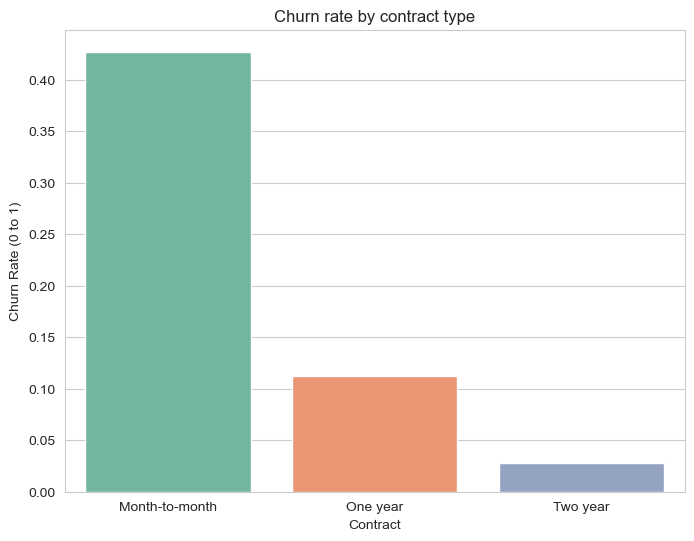

In [14]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x="Contract",y="Churn",hue='Contract',legend=False,data=churn_rate_contract,palette='Set2')
plt.title("Churn rate by contract type")
plt.ylabel('Churn Rate (0 to 1)')
plt.show()

## Churn Analysis by Internet Service

**What I did:**  
Analyzed how different internet service types (DSL, Fiber optic, No service) affect customer churn.

**Why:**  
To understand which service type has higher churn risk.

**Explanation:**  
- Used `groupby()` and `value_counts(normalize=True)`  
- Visualized using a bar plot  

**Insight:**  
Customers using **Fiber optic** service show higher churn.

In [15]:
df.groupby('InternetService')['Churn'].value_counts(normalize=True)

InternetService  Churn
DSL              0        0.810409
                 1        0.189591
Fiber optic      0        0.581072
                 1        0.418928
No               0        0.925950
                 1        0.074050
Name: proportion, dtype: float64

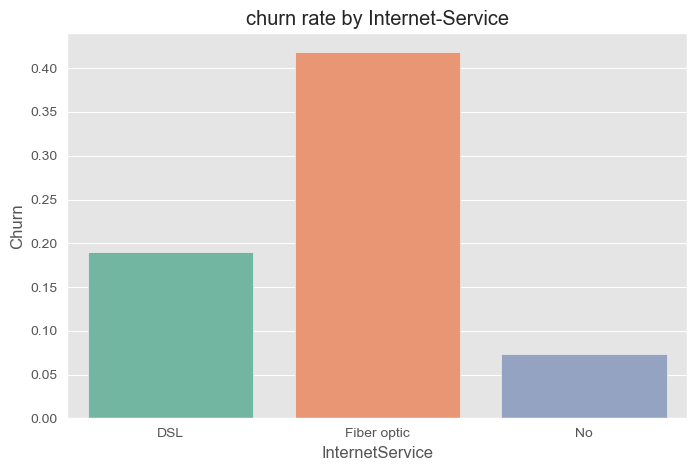

<Figure size 640x480 with 0 Axes>

In [16]:
Churn_rate_Internet=df.groupby('InternetService')['Churn'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.barplot(x='InternetService',y='Churn',hue='InternetService',data=Churn_rate_Internet,palette='Set2')
plt.title('churn rate by Internet-Service')
plt.show()
sns.despine()

## Monthly Charges vs Churn

**What I did:**  
Compared monthly charges between churned and non-churned customers.

**Why:**  
To check if pricing affects churn.

**Explanation:**  
- Used `groupby()` to calculate averages  
- Visualized using a violin plot  

**Insight:**  
Higher charges → higher churn probability.

In [17]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64

C:\Users\ANSHU\AppData\Local\Temp\ipykernel_20944\3014347825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn',y='MonthlyCharges',data=df,palette='coolwarm',inner='box')


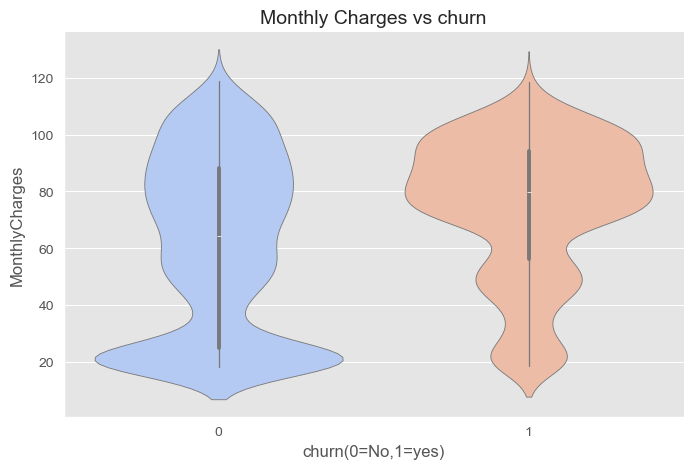

In [18]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.violinplot(x='Churn',y='MonthlyCharges',data=df,palette='coolwarm',inner='box')
plt.title('Monthly Charges vs churn',fontsize=14)
plt.xlabel('churn(0=No,1=yes)')
sns.despine()
plt.show()

## Tenure vs Churn

**What I did:**  
Analyzed customer tenure impact on churn.

**Why:**  
To understand customer loyalty.

**Explanation:**  
- Used `groupby()` for average tenure  
- Visualized using boxplot  

**Insight:**  
Low tenure customers churn more.

In [19]:
df.groupby('Churn')['tenure'].mean()

Churn
0    37.569965
1    17.979133
Name: tenure, dtype: float64

C:\Users\ANSHU\AppData\Local\Temp\ipykernel_20944\1896320398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn',y='tenure',data=df,palette='coolwarm')


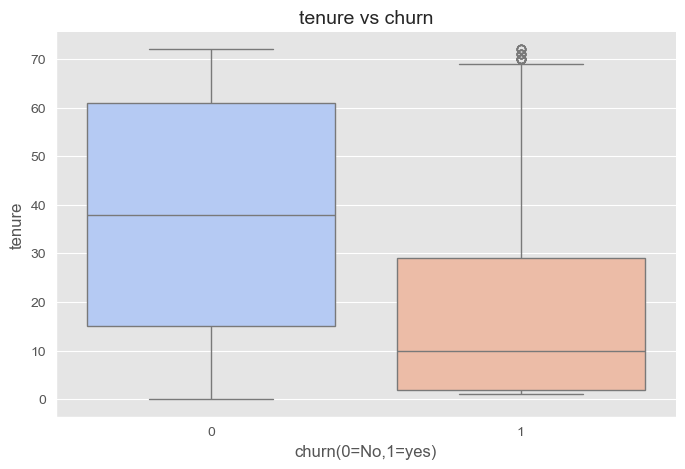

In [20]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.boxplot(x='Churn',y='tenure',data=df,palette='coolwarm')
plt.title('tenure vs churn',fontsize=14)
plt.xlabel('churn(0=No,1=yes)')
sns.despine()
plt.show()

## Churn Distribution

**What I did:**  
Checked distribution of churn values.

**Why:**  
To identify class imbalance.

**Explanation:**  
- Used `countplot()`  

**Insight:**  
Dataset is imbalanced (more non-churn than churn).

C:\Users\ANSHU\AppData\Local\Temp\ipykernel_20944\300528158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn',data=df,palette='Set2')


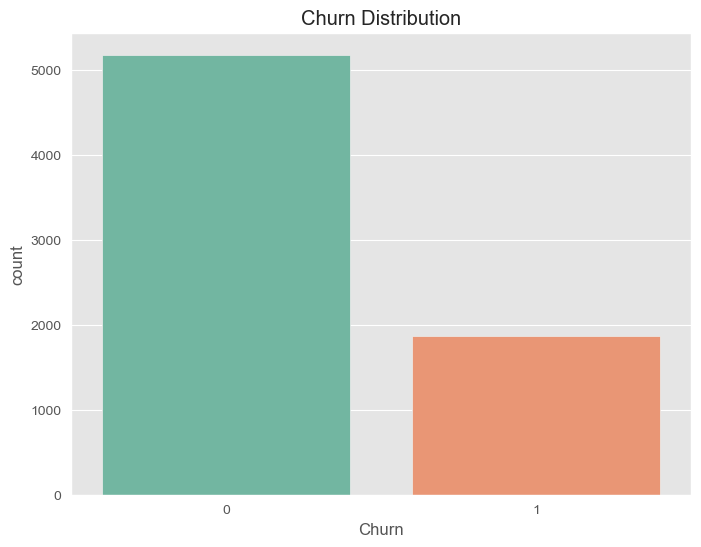

In [21]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.countplot(x='Churn',data=df,palette='Set2')
plt.title('Churn Distribution')
plt.show()

## Data Cleaning & Encoding

**What I did:**  
Prepared dataset for machine learning.

**Why:**  
Models require numerical and clean data.

**Explanation:**  
- Dropped `customerID`  
- Applied `pd.get_dummies()` for encoding  
- Filled missing values in `TotalCharges` using median  

**Insight:**  
Data is now clean and model-ready.

In [22]:
df_encoded=pd.get_dummies(df,drop_first=True)

In [25]:
df=df.drop('customerID',axis=1)

In [26]:
df_encoded=pd.get_dummies(df,drop_first=True)

In [34]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [35]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

C:\Users\ANSHU\AppData\Local\Temp\ipykernel_20944\3929950690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)


In [36]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [37]:
df_encoded=pd.get_dummies(df,drop_first=True)

In [38]:
df_encoded=df_encoded.astype(int)

## Feature Selection

**What I did:**  
Selected important features manually.

**Why:**  
To reduce noise and focus on key variables.

**Explanation:**  
- Selected features like tenure, charges, services, contract  
- Converted data to integer format  

**Insight:**  
Improves model understanding and visualization.

In [ ]:
important_features = [
    'Churn',
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'SeniorCitizen',
    'Partner_Yes',
    'Dependents_Yes',
    'InternetService_Fiber optic',
    'InternetService_No',
    'OnlineSecurity_Yes',
    'TechSupport_Yes',
    'Contract_One year',
    'Contract_Two year',
    'PaperlessBilling_Yes',
    'PaymentMethod_Electronic check'
]

## Correlation Heatmap

**What I did:**  
Analyzed relationships between features and churn.

**Why:**  
To identify most impactful features.

**Explanation:**  
- Used `.corr()` to compute correlation  
- Visualized using heatmap  

**Insight:**  
- Tenure → negative correlation  
- MonthlyCharges → positive correlation  
- Contract type strongly affects churn  

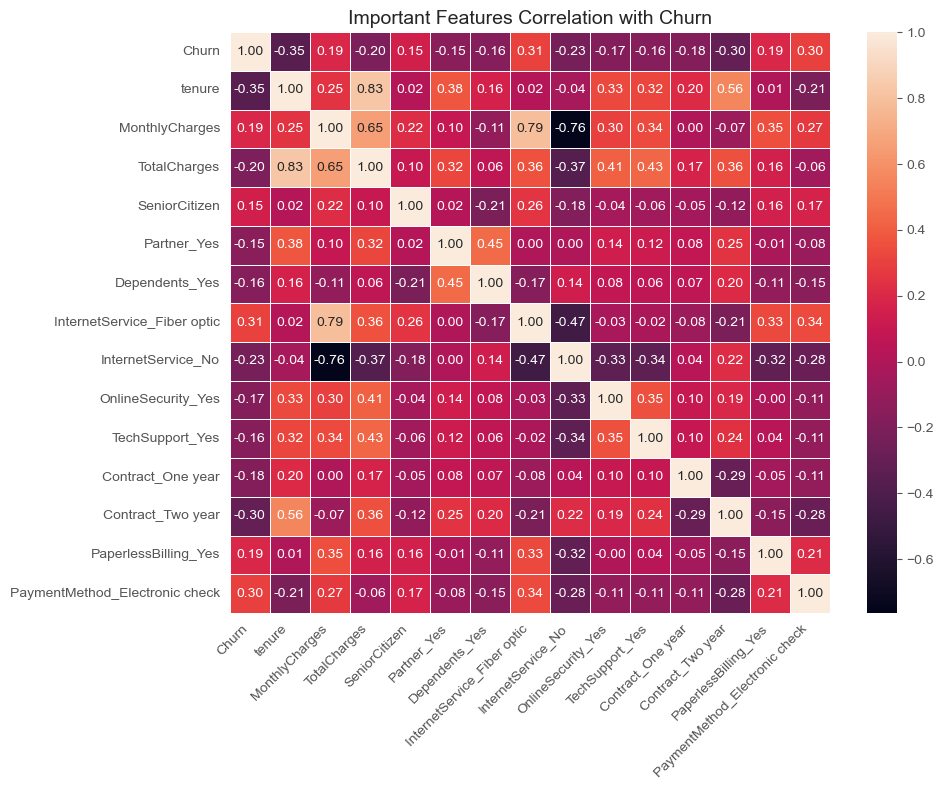

In [44]:
plt.figure(figsize=(10,8))

corr = df_encoded[important_features].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='rocket',
    fmt='.2f',
    linewidths=0.5
)

plt.title("Important Features Correlation with Churn", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Feature & Target Separation

We separate the dataset into:
- **X (Features):** All independent variables
- **y (Target):** Churn column (what we want to predict)



In [45]:
X=df_encoded.drop('Churn',axis=1)
y=df_encoded['Churn']

### Train-Test Split

The dataset is split into training and testing sets:
- **80% Training Data**
- **20% Testing Data**

Stratified sampling is used to maintain class balance.



In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y )

### Feature Scaling

- StandardScaler is used to normalize the feature values.
- Both training and testing data are scaled.

In [48]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

### Machine Learning Models

The following models are used:

- Logistic Regression
- K-Nearest Neighbors (KNN)
- Naive Bayes
- Decision Tree

These models are selected to compare different learning approaches.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Logistic Regression Model

Logistic Regression is trained on scaled data.

- Used for binary classification
- Outputs probability of churn (Yes/No)

Predictions are generated on test data.

In [50]:
logistic=LogisticRegression(max_iter=1000)
logistic.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [58]:
lpredict=logistic.predict(X_test_scaled)
lpredict

array([0, 1, 0, ..., 0, 0, 0])

### K-Nearest Neighbors (KNN)

KNN is trained with:
- Number of neighbors = 5

It classifies based on similarity (distance) between data points.

Predictions are made on test data.

In [51]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [59]:
k_predict=KNN.predict(X_test_scaled)
k_predict

array([0, 1, 0, ..., 0, 0, 0])

###  Naive Bayes Model

Gaussian Naive Bayes is used.

- Based on probability theory Bayes Theorem
- Assumes feature independence

Predictions are generated for evaluation.

In [52]:
NaiveBias=GaussianNB()
NaiveBias.fit(X_train,y_train)

GaussianNB()

In [61]:
naive_predict=NaiveBias.predict(X_test)
naive_predict

array([0, 1, 0, ..., 0, 0, 0])

###  Decision Tree Model

Decision Tree is trained using:
- Random state = 42

It splits data based on feature importance to make decisions.

Predictions are generated on test data.

In [53]:
Decisiontree=DecisionTreeClassifier(random_state=42)
Decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
d_predict=Decisiontree.predict(X_test)
d_predict

array([0, 1, 0, ..., 0, 0, 0])

### Model Accuracy Comparison

Accuracy scores of all models:

- Logistic Regression = 80%
- KNN = 74%
- Naive Bayes = 65%
- Decision Tree = 72%

Logistic Regression performs the best among all models.

In [64]:
from sklearn.metrics import accuracy_score,classification_report

In [65]:
print("LogisticRegression",accuracy_score(y_test,lpredict))

LogisticRegression 0.8069552874378992


In [66]:
print("KNN",accuracy_score(y_test,k_predict))

KNN 0.7473385379701917


In [67]:
print("NaiveBias",accuracy_score(y_test,naive_predict))

NaiveBias 0.6557842441447835


In [68]:
print("DecisionTree",accuracy_score(y_test,d_predict))

DecisionTree 0.7274662881476224


###  Model Evaluation (Classification Report)

Each model is evaluated using:

- Precision
- Recall
- F1-score
- Support

This gives deeper insight beyond accuracy.


In [69]:
print('LogisticRegression\n',classification_report(y_test,lpredict))

LogisticRegression
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [70]:
print('KNN\n',classification_report(y_test,k_predict))

KNN
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1035
           1       0.53      0.49      0.51       374

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.74      1409



In [71]:
print('NaiveBias\n',classification_report(y_test,naive_predict))

NaiveBias
               precision    recall  f1-score   support

           0       0.92      0.58      0.71      1035
           1       0.43      0.87      0.57       374

    accuracy                           0.66      1409
   macro avg       0.67      0.72      0.64      1409
weighted avg       0.79      0.66      0.67      1409



In [72]:
print('DecisionTree\n',classification_report(y_test,d_predict))

DecisionTree
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1035
           1       0.49      0.48      0.48       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



Observation:
- Logistic Regression gives balanced performance
- Other models struggle with minority class (churn = 1)

###  Improved Logistic Regression (Class Imbalance Handling)

To improve performance, class imbalance is handled using:

- class_weight = 'balanced'

This gives more importance to minority class (churn customers).

Result:
- Better recall for churn prediction
- Improved overall model balance

In [73]:
lg_balanced=LogisticRegression(class_weight='balanced',max_iter=1000)
lg_balanced.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [75]:
lg_pred_bal=lg_balanced.predict(X_test_scaled)
lg_pred_bal

array([0, 1, 0, ..., 0, 0, 0])

In [76]:
print('Improved logisticregression\n',classification_report(y_test,lg_pred_bal))

Improved logisticregression
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [77]:
from sklearn.metrics import confusion_matrix
print('LogisticRegression\n',confusion_matrix(y_test,lg_pred_bal))

LogisticRegression
 [[750 285]
 [ 81 293]]


In [89]:
feature_importance=pd.DataFrame({'Feature':X.columns,'Importance':lg_balanced.coef_[0]})
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)

###  Final Conclusion

- Logistic Regression performed best overall
- Class imbalance handling improved prediction quality
- Important factors affecting churn:
  - Contract type
  - Monthly charges
  - Tenure
  - Internet service

This model can help businesses:
- Identify at-risk customers
- Take preventive actions to reduce churn

##  Top Features Affecting Customer Churn

In this step, we visualize the **most important features** influencing customer churn using a bar plot.

* Features are ranked based on their importance in the model
* Higher values indicate stronger impact on churn prediction



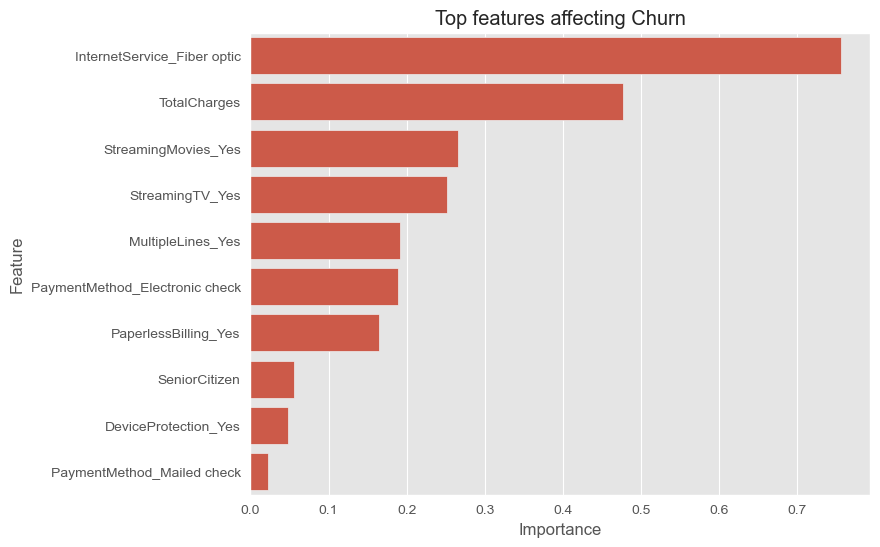

In [91]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.barplot(x='Importance',y='Feature',data=feature_importance.head(10))
plt.title('Top features affecting Churn')
plt.show()

### Key Insights:

* **Fiber optic internet service** has the highest impact on churn
* **Total charges** and **monthly services (TV, Movies)** also play a major role
* Payment method and billing type influence customer behavior

 This visualization helps businesses understand *why customers are leaving* and where to focus improvements.

##  Logistic Regression - Confusion Matrix

The confusion matrix shows how well the Logistic Regression model classifies churn.

* **True Positives (TP):** Correctly predicted churn customers
* **True Negatives (TN):** Correctly predicted non-churn customers
* **False Positives (FP):** Incorrectly predicted churn
* **False Negatives (FN):** Missed churn customers

###  Insight:

* Model performs well in identifying **non-churn customers**
* Some churn cases are missed → scope for improvement

 Overall, Logistic Regression provides a balanced performance.


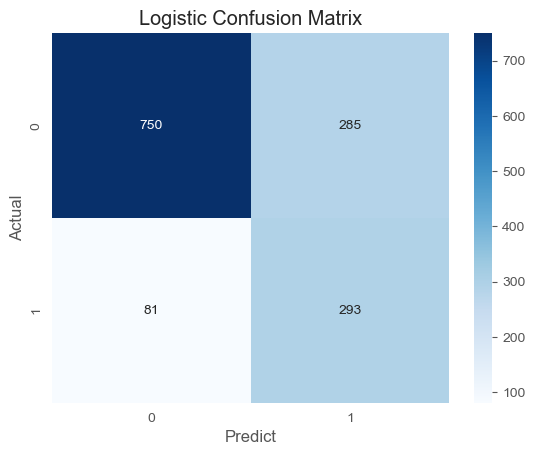

In [81]:
cm=confusion_matrix(y_test,lg_pred_bal)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Logistic Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

##  KNN - Confusion Matrix

This matrix represents the performance of the K-Nearest Neighbors model.

### Insight:

* Good at predicting **non-churn customers**
* Struggles more with identifying churn customers

 KNN is sensitive to feature scaling and data distribution.


In [78]:
print('KNN\n',confusion_matrix(y_test,k_predict))

KNN
 [[869 166]
 [190 184]]


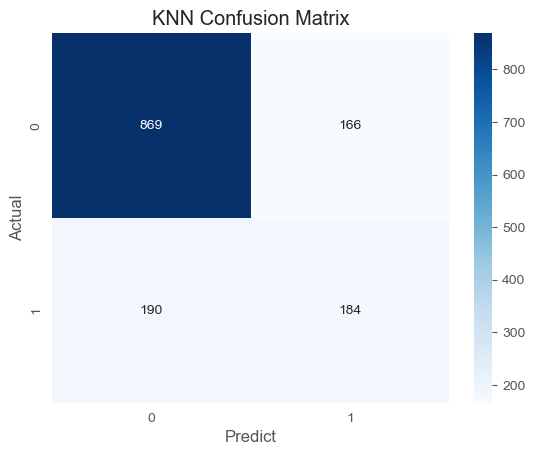

In [84]:
cm2=confusion_matrix(y_test,k_predict)
sns.heatmap(cm2,annot=True,fmt='d',cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

##  Naive Bayes - Confusion Matrix

This confusion matrix evaluates the Naive Bayes model.

###  Insight:

* Better at detecting **churn customers** compared to some models
* But misclassifies more **non-churn customers**

 Naive Bayes assumes feature independence, which may reduce accuracy.


In [79]:
print('NaiveBias\n',confusion_matrix(y_test,naive_predict))

NaiveBias
 [[600 435]
 [ 50 324]]


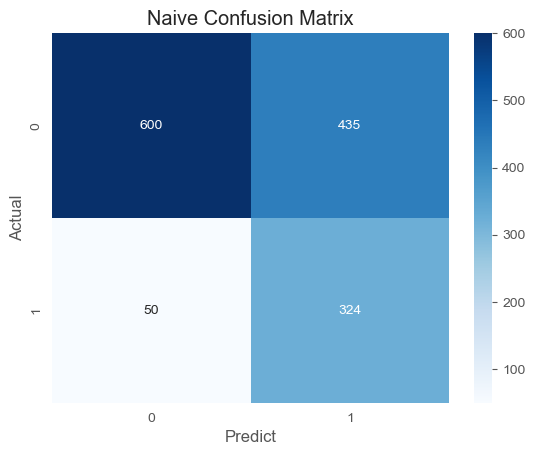

In [85]:
cm3=confusion_matrix(y_test,naive_predict)
sns.heatmap(cm3,annot=True,fmt='d',cmap='Blues')
plt.title('Naive Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

##  Decision Tree - Confusion Matrix

This matrix shows predictions made by the Decision Tree model.

###  Insight:

* Captures patterns well but may **overfit the data**
* Balanced performance but less stable than Logistic Regression

 Decision Trees are powerful but require tuning to improve generalization.


In [80]:
print('DecisionTree\n',confusion_matrix(y_test,d_predict))

DecisionTree
 [[846 189]
 [195 179]]


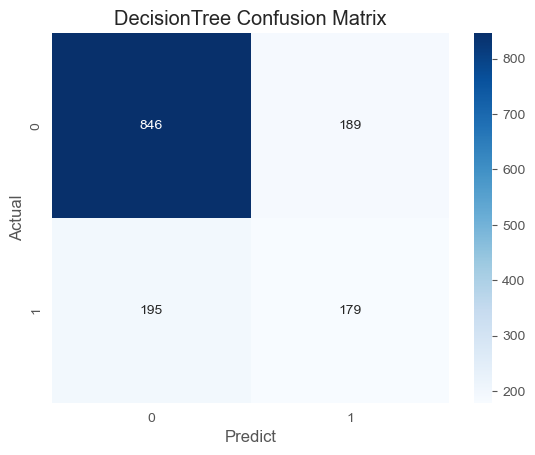

In [86]:
cm4=confusion_matrix(y_test,d_predict)
sns.heatmap(cm4,annot=True,fmt='d',cmap='Blues')
plt.title('DecisionTree Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()